In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

print('Using:')
print('\t\u2022 TensorFlow version:', tf.__version__)
print('\t\u2022 Running on GPU' if tf.test.is_gpu_available() else '\t\u2022 GPU device not found. Running on CPU')

Using:
	• TensorFlow version: 2.15.0
	• GPU device not found. Running on CPU


In [2]:
dataset, dataset_info = tfds.load('fashion_mnist', as_supervised = True, with_info = True)

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
print('dataset has type:', type(dataset))

dataset has type: <class 'dict'>


In [4]:
print('\nThe keys of dataset are:', list(dataset.keys()))


The keys of dataset are: [Split('train'), Split('test')]


In [5]:
training_set, test_set = dataset['train'], dataset['test']

In [6]:
dataset_info

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_dir=PosixGPath('/tmp/tmpm_vqf8p1tfds'),
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao an

In [7]:
print(dataset_info.features['image'])
print(dataset_info.features['label'])
print(dataset_info.splits['train'])

Image(shape=(28, 28, 1), dtype=uint8)
ClassLabel(shape=(), dtype=int64, num_classes=10)
<SplitInfo num_examples=60000, num_shards=1>


In [8]:
shape_images = dataset_info.features['image'].shape
num_classes = dataset_info.features['label'].num_classes

num_training_examples  = dataset_info.splits['train'].num_examples
num_test_examples = dataset_info.splits['test'].num_examples

print(f'There are {num_classes:,} classes in our dataset')
print(f'The images in our dataset have shape: {shape_images}')

print(f'\nThere are {num_test_examples:,} images in the test set')
print(f'There are {num_training_examples:,} images in the training set')

There are 10 classes in our dataset
The images in our dataset have shape: (28, 28, 1)

There are 10,000 images in the test set
There are 60,000 images in the training set


In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for image, label in training_set.take(1):
    print('The images in the training set have:\n\u2022 dtype:', image.dtype, '\n\u2022 shape:', image.shape)

The images in the training set have:
• dtype: <dtype: 'uint8'> 
• shape: (28, 28, 1)


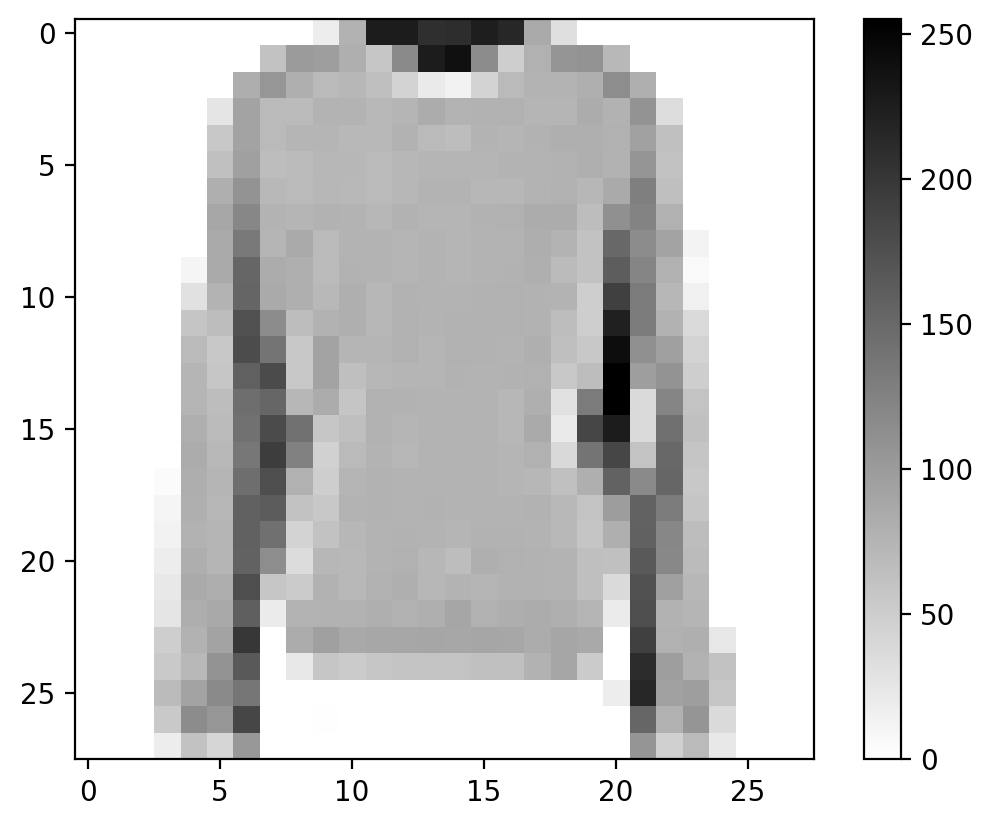

The label of this image is: 2
The class name of this image is: Pullover


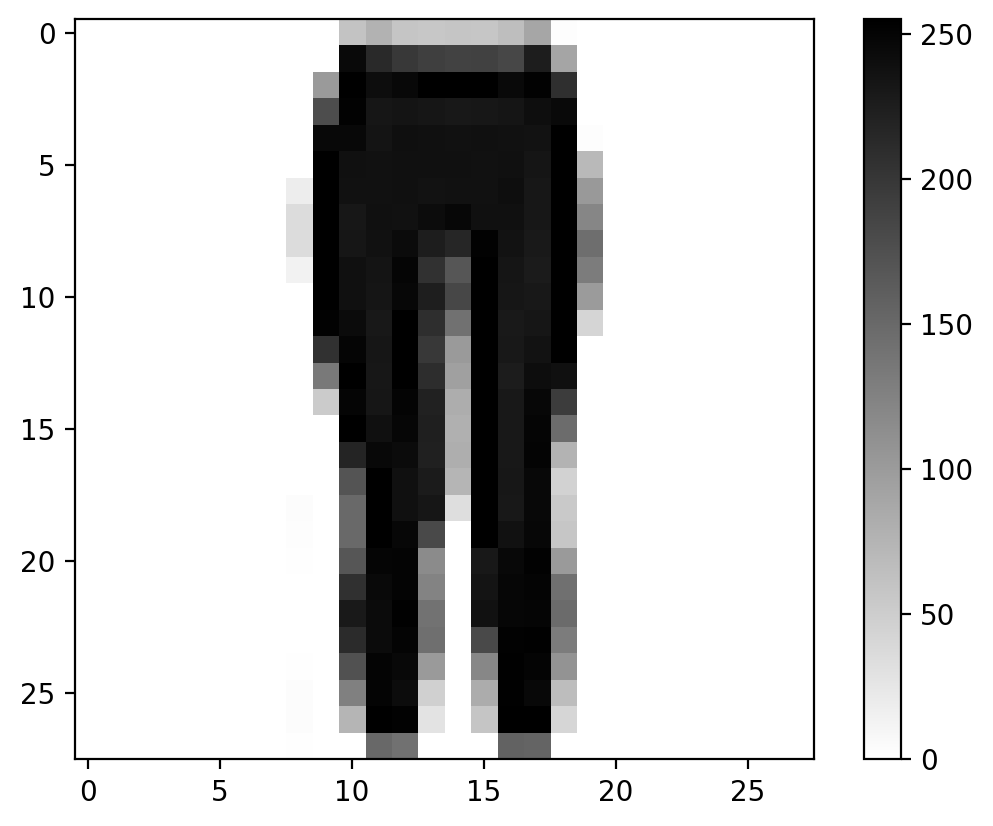

The label of this image is: 1
The class name of this image is: Trouser


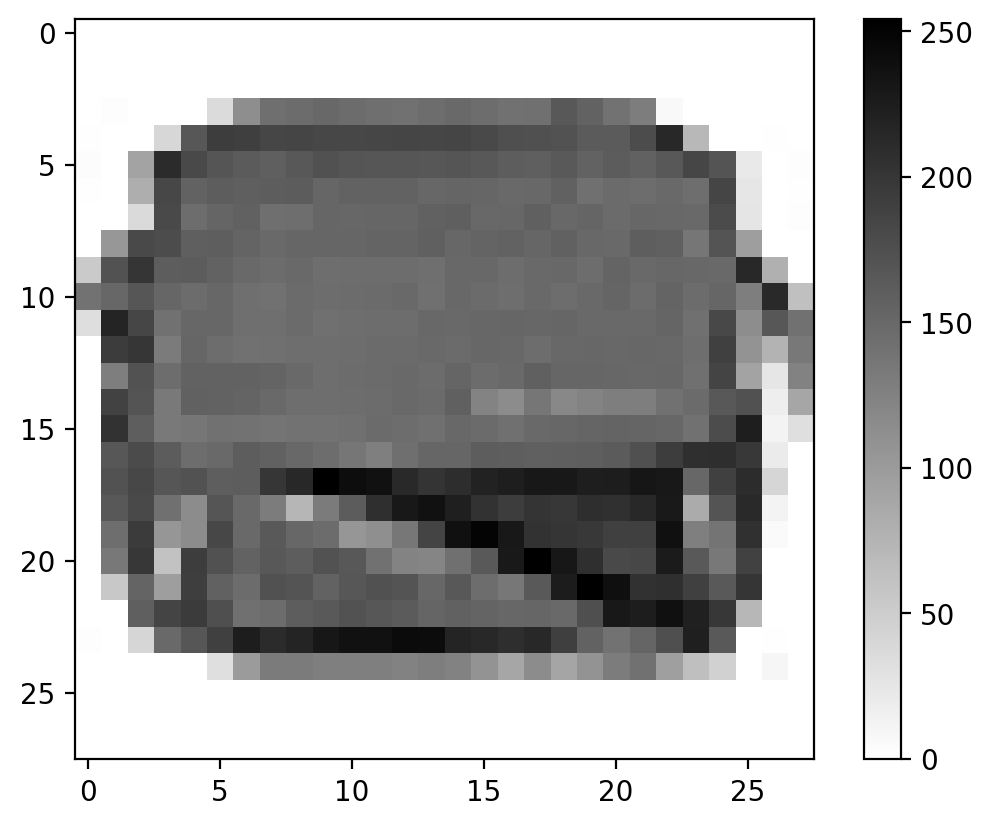

The label of this image is: 8
The class name of this image is: Bag


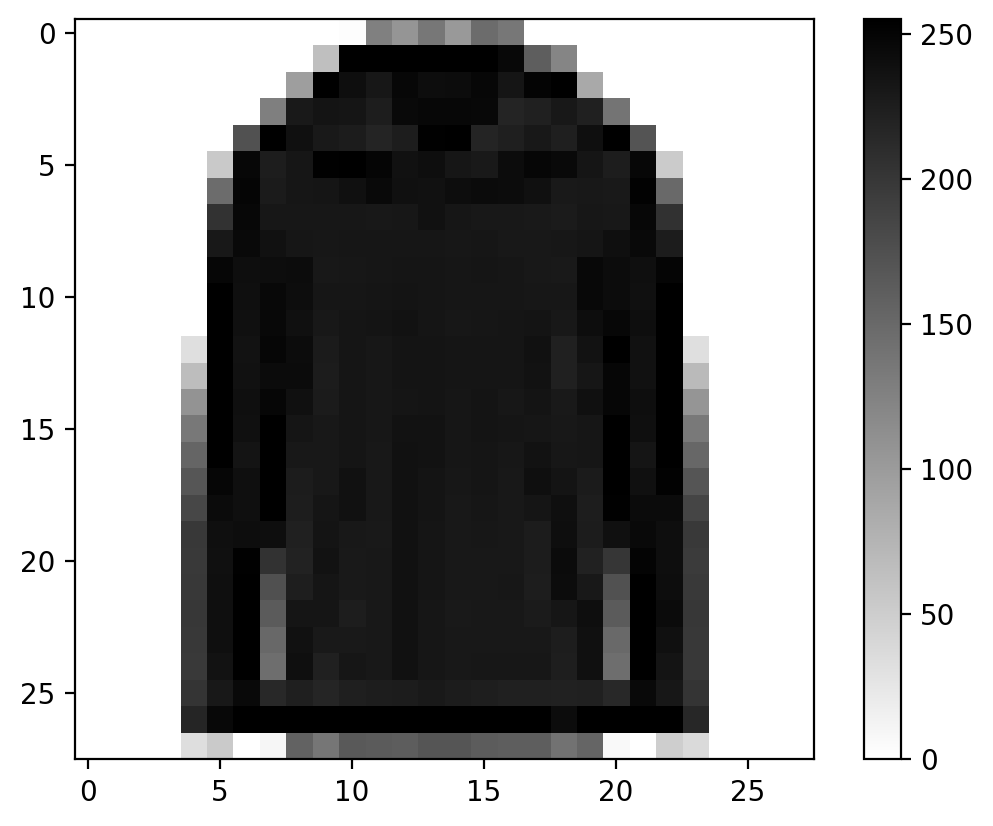

The label of this image is: 4
The class name of this image is: Coat


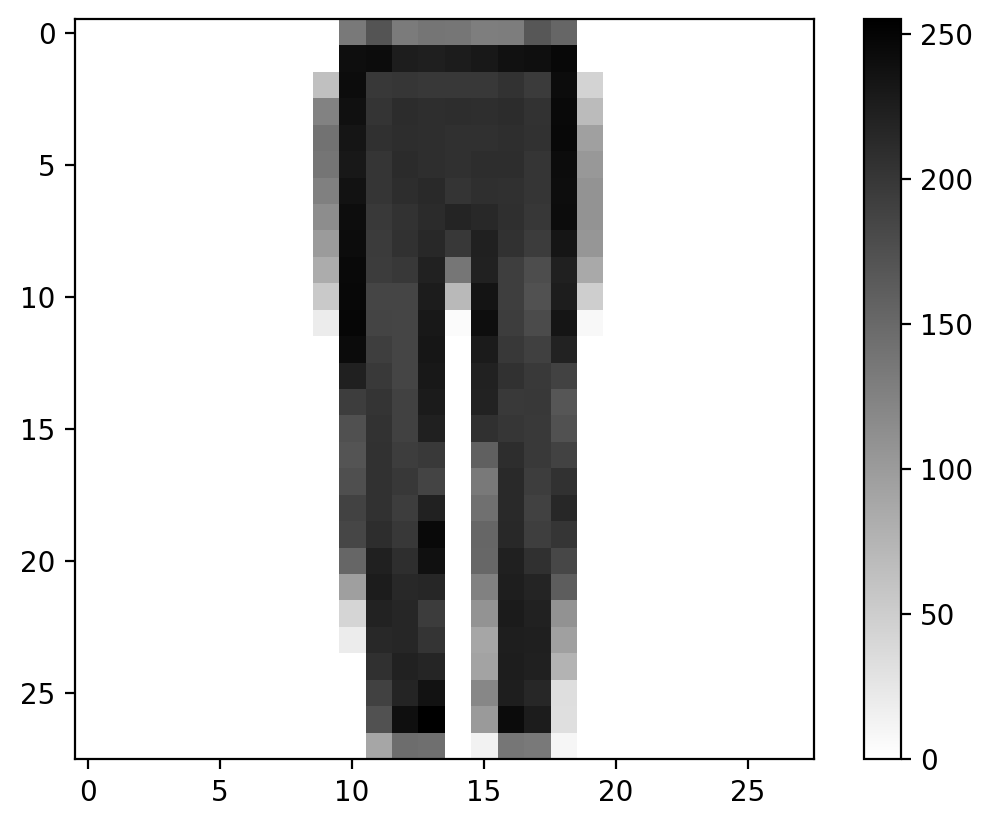

The label of this image is: 1
The class name of this image is: Trouser


In [10]:
for image, label in training_set.take(5):
    image = image.numpy().squeeze()
    label = label.numpy()

    plt.imshow(image, cmap= plt.cm.binary)
    plt.colorbar()
    plt.show()

    print('The label of this image is:', label)
    print('The class name of this image is:', class_names[label])

In [11]:
def normalize(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255
    return image, label

batch_size = 64

training_batches = training_set.cache().shuffle(num_training_examples//4).batch(batch_size).map(normalize).prefetch(1)
testing_batches = test_set.cache().batch(batch_size).map(normalize).prefetch(1)

In [12]:
layer_neurons = [512, 256, 128, 56, 28, 14]

my_model = tf.keras.Sequential()
my_model.add(tf.keras.layers.Flatten(input_shape = (28,28,1)))
for i in layer_neurons:
    my_model.add(tf.keras.layers.Dense(i, activation = 'relu'))

my_model.add(tf.keras.layers.Dense(10, activation='softmax'))

my_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

for image_batch, label_batch in training_batches.take(1):
    loss, accuracy = my_model.evaluate(image_batch, label_batch)

print(f'\nLoss befor training: {loss:,.3f}')
print(f'Accuracy befor training: {accuracy:.3%}')

2/2 [==============================] - 1s 17ms/step - loss: 2.3873 - accuracy: 0.0781

Loss befor training: 2.387
Accuracy befor training: 7.812%


In [13]:
EPOCHS = 10
my_model.fit(training_batches, epochs = EPOCHS)

for image_batch, label_batch in training_batches.take(1):
    loss, accuracy = my_model.evaluate(image_batch, label_batch)

print(f'\nLoss after training: {loss:,.3f}')
print(f'Accuracy after training: {accuracy:.3%}')

Epoch 1/10
938/938 [==============================] - 19s 17ms/step - loss: 0.5743 - accuracy: 0.7962
Epoch 2/10
938/938 [==============================] - 12s 13ms/step - loss: 0.3787 - accuracy: 0.8633
Epoch 3/10
938/938 [==============================] - 13s 13ms/step - loss: 0.3423 - accuracy: 0.8739
Epoch 4/10
938/938 [==============================] - 13s 14ms/step - loss: 0.3170 - accuracy: 0.8833
Epoch 5/10
938/938 [==============================] - 13s 14ms/step - loss: 0.3013 - accuracy: 0.8895
Epoch 6/10
938/938 [==============================] - 12s 13ms/step - loss: 0.2800 - accuracy: 0.8952
Epoch 7/10
938/938 [==============================] - 12s 13ms/step - loss: 0.2674 - accuracy: 0.9007
Epoch 8/10
938/938 [==============================] - 12s 13ms/step - loss: 0.2570 - accuracy: 0.9040
Epoch 9/10
938/938 [==============================] - 13s 14ms/step - loss: 0.2482 - accuracy: 0.9074
Epoch 10/10
2/2 [==============================] - 0s 9ms/step - loss: 0.2393 - ac

In [14]:
loss, accuracy = my_model.evaluate(testing_batches)

print(f'\nLoss on the TEST Set: {loss:,.3f}')
print(f'Accuracy on the TEST Set: {accuracy:.3%}')

157/157 [==============================] - 2s 9ms/step - loss: 0.3505 - accuracy: 0.8818

Loss on the TEST Set: 0.350
Accuracy on the TEST Set: 88.180%


2/2 [==============================] - 0s 6ms/step


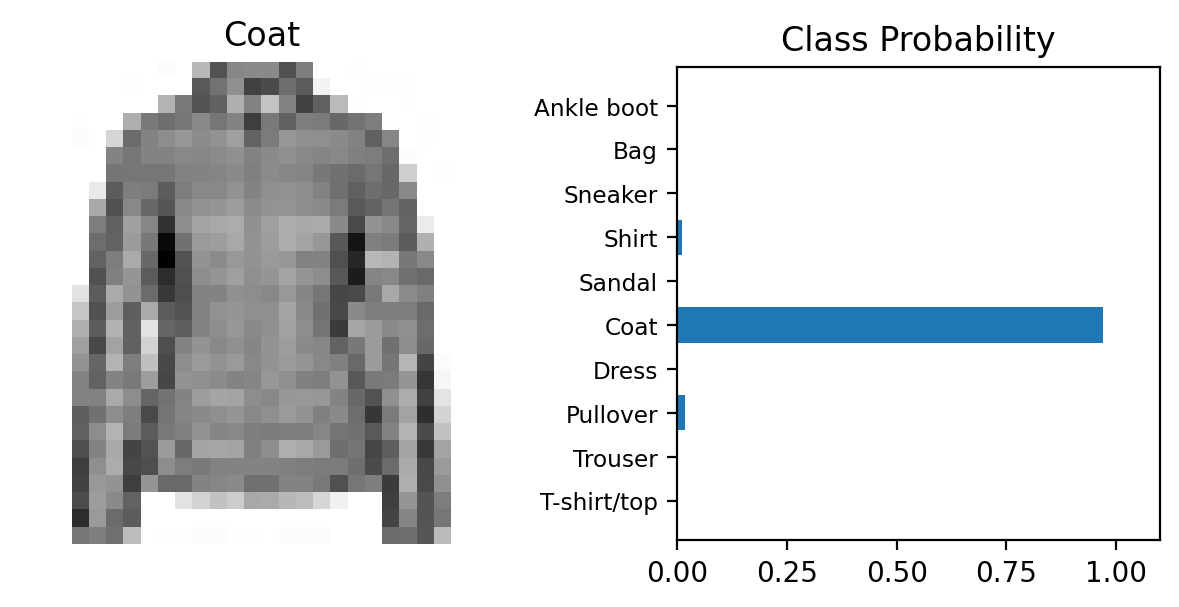

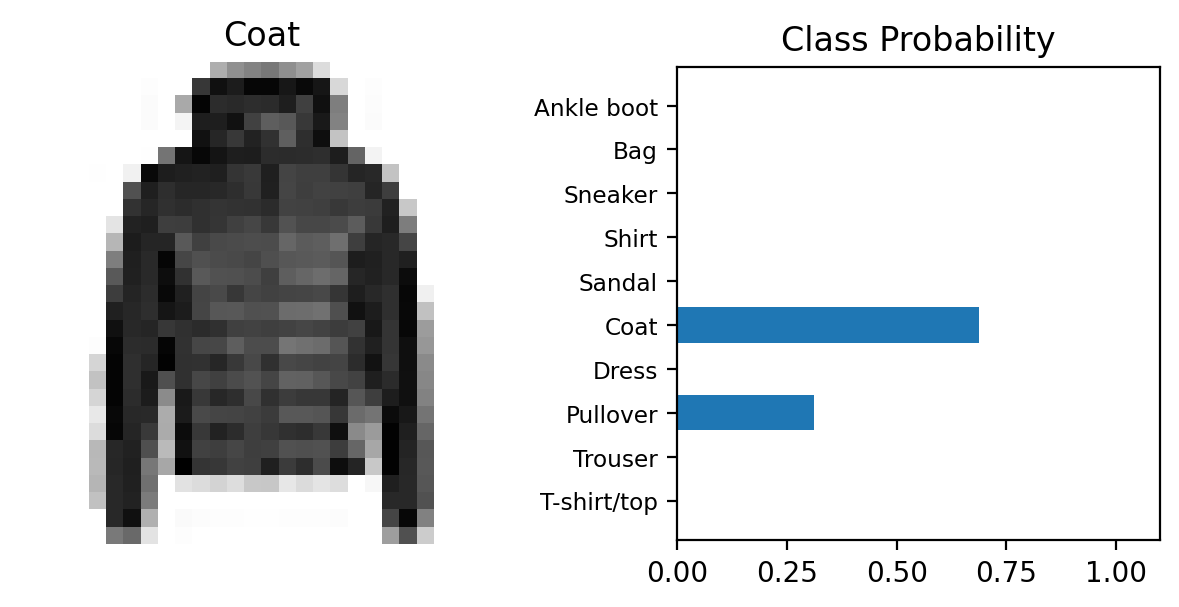

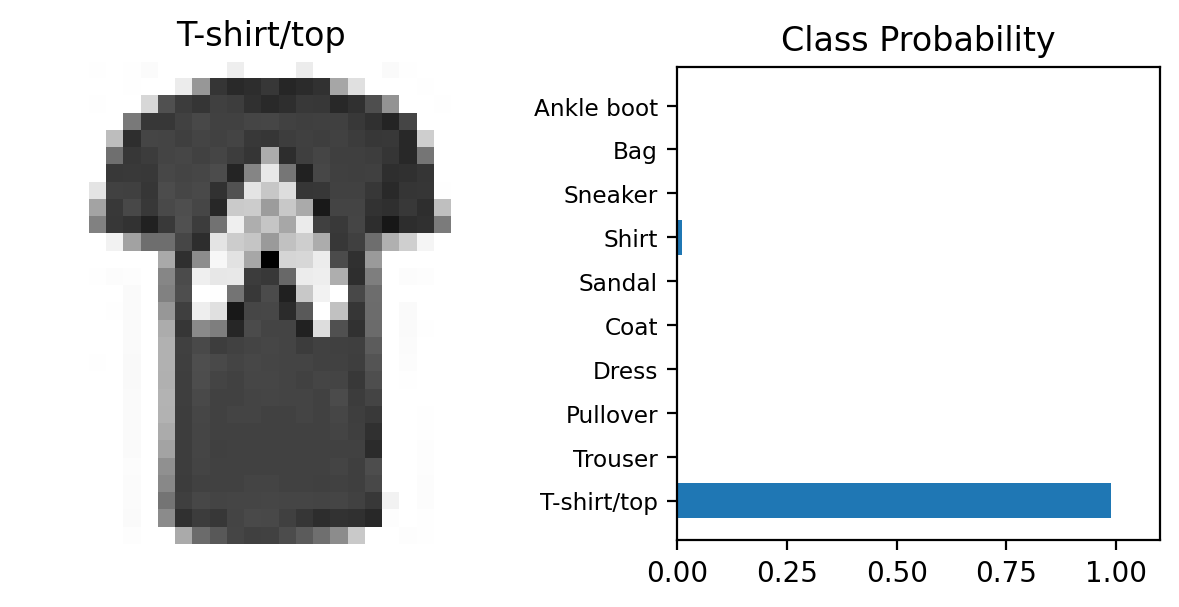

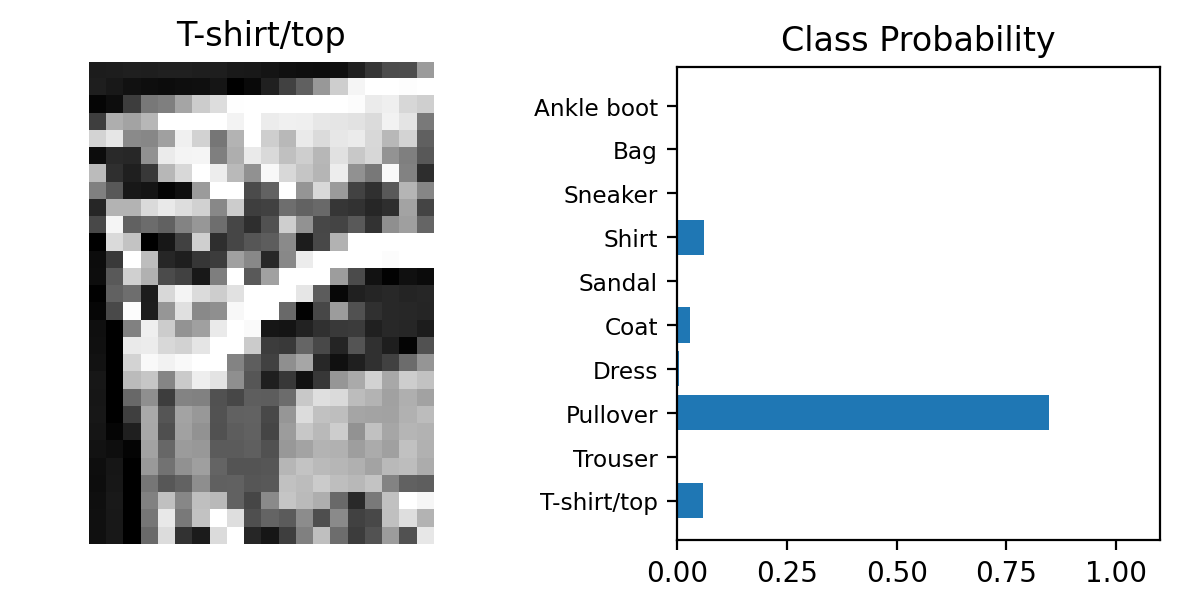

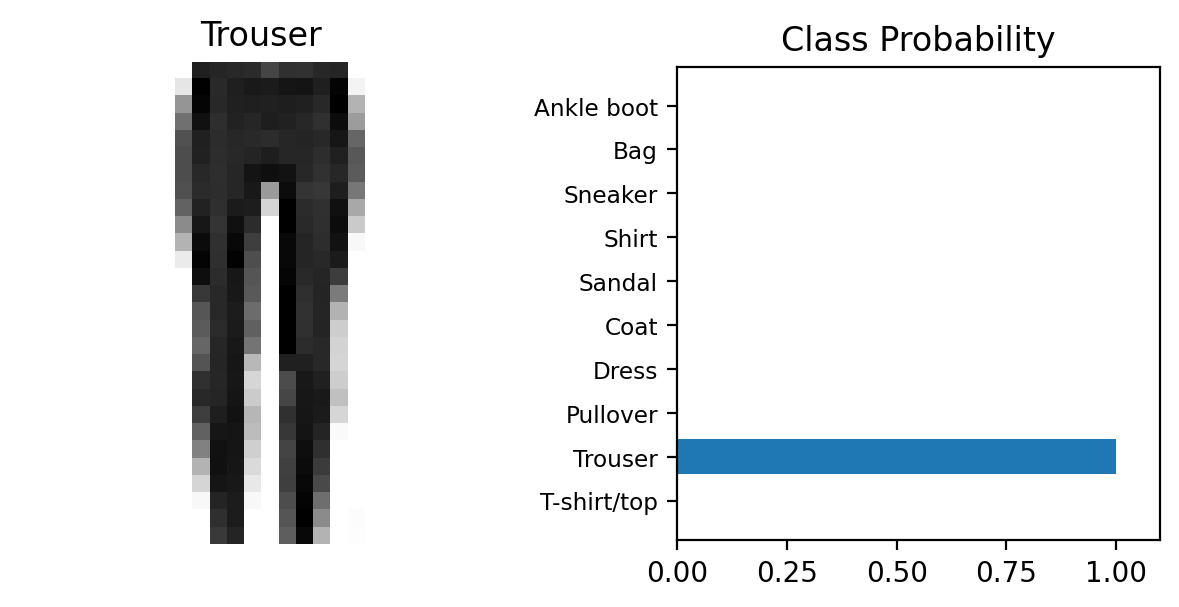

In [15]:
for image_batch, label_batch in testing_batches.take(5):
    ps = my_model.predict(image_batch)
    first_image = image_batch.numpy().squeeze()[0]
    first_label = label_batch.numpy()[0]

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(first_image, cmap = plt.cm.binary)
    ax1.axis('off')
    ax1.set_title(class_names[first_label])
    ax2.barh(np.arange(10), ps[0])
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(class_names, size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()